### Importing libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

### loading the Raw data

In [3]:
medical_data = pd.read_csv ("Downloads/Medical_insurance.csv")

In [4]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
medical_data.shape

(2772, 7)

In [6]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
medical_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772,2772.000000,2772.000000,2772,2772,2772.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1406,NaN,NaN,2208,766,NaN
mean,39.109668,NaN,30.701349,1.101732,NaN,NaN,13261.369959
std,14.081459,NaN,6.129449,1.214806,NaN,NaN,12151.768945
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4687.797000
50%,39.000000,NaN,30.447500,1.000000,NaN,NaN,9333.014350
75%,51.000000,NaN,34.770000,2.000000,NaN,NaN,16577.779500


In [8]:
medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data_no_mv = medical_data.copy()

### Data Exploration

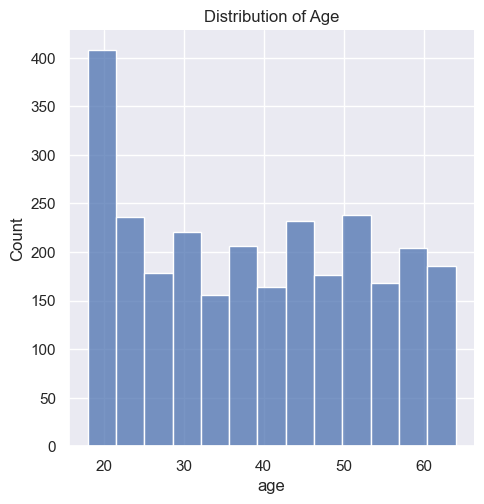

In [45]:
# distribution of age variable

sns.displot(data_no_mv['age'])
plt.title('Distribution of Age')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

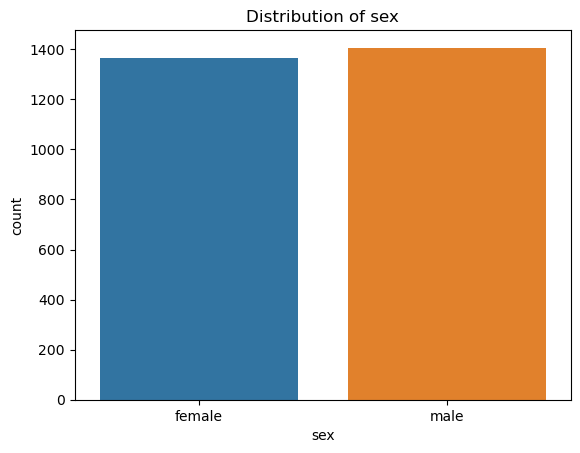

In [12]:
# plot of sex variables

sns.countplot(x = 'sex', data = data_no_mv)
plt.title('Distribution of sex')
plt.show

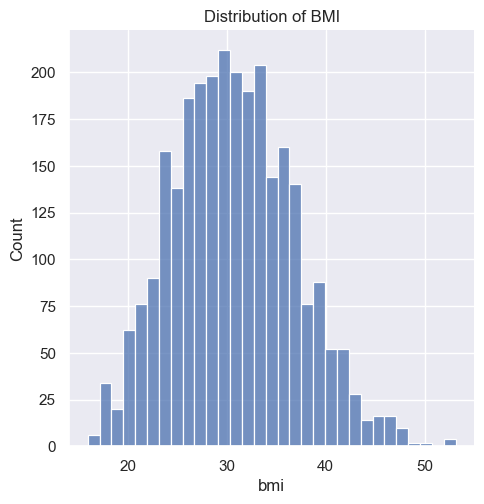

In [46]:
# distribution of bmi variable

sns.displot(data_no_mv['bmi'])
plt.title('Distribution of BMI')
plt.show()


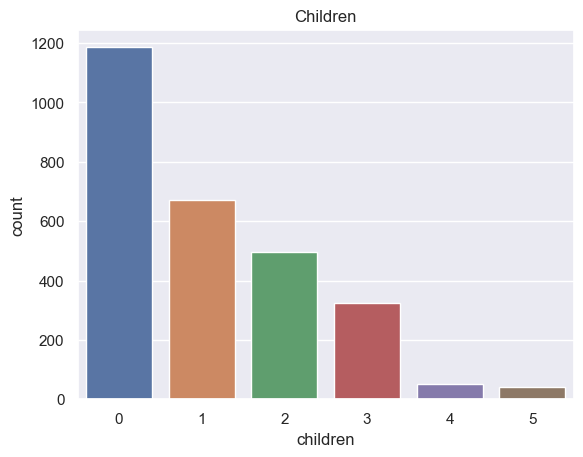

In [47]:
# plot of children variable

sns.countplot(x = 'children', data = data_no_mv)
plt.title('Children')
plt.show()

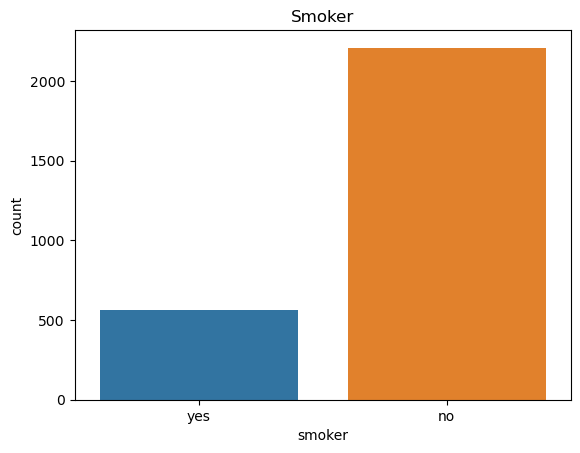

In [15]:
# plot of smoker variable

sns.countplot(x = 'smoker', data = data_no_mv)
plt.title('Smoker')
plt.show()

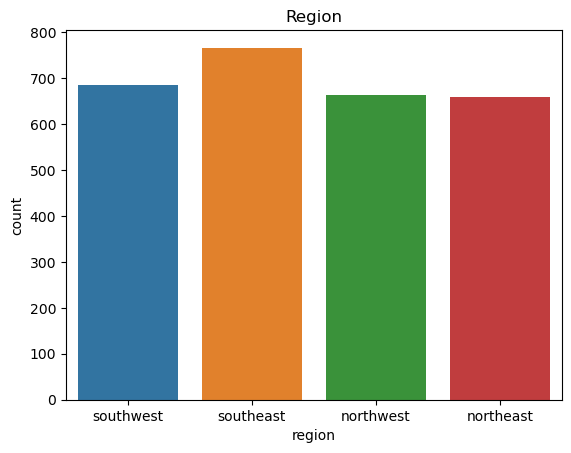

In [16]:
# plot of region variable

sns.countplot(x = 'region', data = data_no_mv)
plt.title('Region')
plt.show()

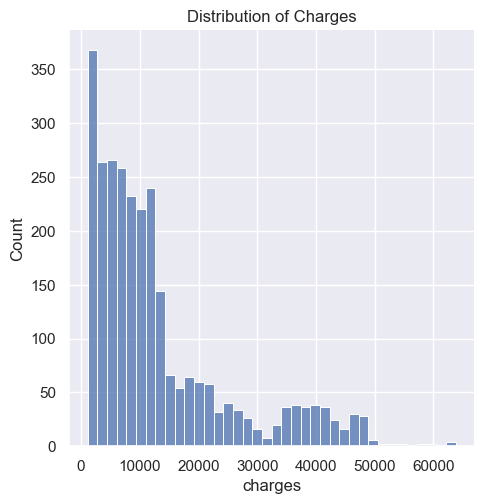

In [48]:
# distribution of charges variable

sns.displot(data_no_mv['charges'])
plt.title('Distribution of Charges')
plt.show()

### Data Preprocessing

Encoding the categorical features

In [19]:
# Categorical features: Sex, Smoker, and Region.

data = data_no_mv.copy()

# Assigning values for 'smoker' feature

data['smoker'] = data['smoker'].map({'yes':1, 'no':0})

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [20]:
# As we know that 'sex' and 'region' are nominal categorical variables
# We will create dummy variable

dummies = pd.get_dummies(data['sex'])

# Let's have a look

dummies

,female,male
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
2767,True,False
2768,True,False
2769,False,True
2770,False,True


In [21]:
# One-Hot Encoder
# We will use this method to feed this feature to the machine

ohe = OneHotEncoder()

feature_array = ohe.fit_transform(data[['region']]).toarray()

In [22]:
# Let's see the following categories in column region

feature_labels = ohe.categories_

print(feature_labels)

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [23]:
# Creating one array

feature_labels = np.array(feature_labels).ravel()

print(feature_labels)

['northeast' 'northwest' 'southeast' 'southwest']


In [24]:
# We are now making a data frame of these labels

features = pd.DataFrame(feature_array, columns = feature_labels)

features.head()

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [25]:
# We will now join the dummy variable and OHE columns to original dataset

data_new = pd.concat([data, dummies, features], axis=1)

data_new = data_new.drop(columns='region', axis=1)
data_new = data_new.drop(columns='sex', axis=1)

data_new.head()

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,True,False,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1725.55230,False,True,0.0,0.0,1.0,0.0
2,28,33.000,3,0,4449.46200,False,True,0.0,0.0,1.0,0.0
3,33,22.705,0,0,21984.47061,False,True,0.0,1.0,0.0,0.0
4,32,28.880,0,0,3866.85520,False,True,0.0,1.0,0.0,0.0


### Splitting the Features and Targets

In [26]:
# declare the variables

y = data_new.charges
x = data_new.drop(columns='charges', axis=1)

In [27]:
# let's have a look at the target variables

print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


In [28]:
# let's have a look at the features

print(x)

      age     bmi  children  smoker  female   male  northeast  northwest  \
0      19  27.900         0       1    True  False        0.0        0.0   
1      18  33.770         1       0   False   True        0.0        0.0   
2      28  33.000         3       0   False   True        0.0        0.0   
3      33  22.705         0       0   False   True        0.0        1.0   
4      32  28.880         0       0   False   True        0.0        1.0   
...   ...     ...       ...     ...     ...    ...        ...        ...   
2767   47  45.320         1       0    True  False        0.0        0.0   
2768   21  34.600         0       0    True  False        0.0        0.0   
2769   19  26.030         1       1   False   True        0.0        1.0   
2770   23  18.715         0       0   False   True        0.0        1.0   
2771   54  31.600         0       0   False   True        0.0        0.0   

      southeast  southwest  
0           0.0        1.0  
1           1.0        0.0  


### Splitting the data into training data & testing data

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [30]:
# By looking at the shape, we could see the number of observations which are training and testing

print(x.shape, x_train.shape, x_test.shape)

(2772, 10) (2217, 10) (555, 10)


### Model Training

Linear Regression

In [32]:
# Check the regression

reg = LinearRegression()
reg.fit(x_train.values, y_train.values)

LinearRegression()

### Model Evaluation

In [33]:
# prediction on training data

train_data_pred = reg.predict(x_train.values)

In [34]:
# R squared value

from sklearn import metrics

r2_train = metrics.r2_score(y_train, train_data_pred)

print('R squared value: ',r2_train)

R squared value:  0.7563466835915891


In [35]:
# prediction on testing data

test_data_pred = reg.predict(x_test.values)

In [36]:
# R squared value

r2_test = metrics.r2_score(y_test, test_data_pred)

print('R squared value: ',r2_test)

R squared value:  0.7285703173274255


Text(0.5, 1.0, 'Residuals PDF')

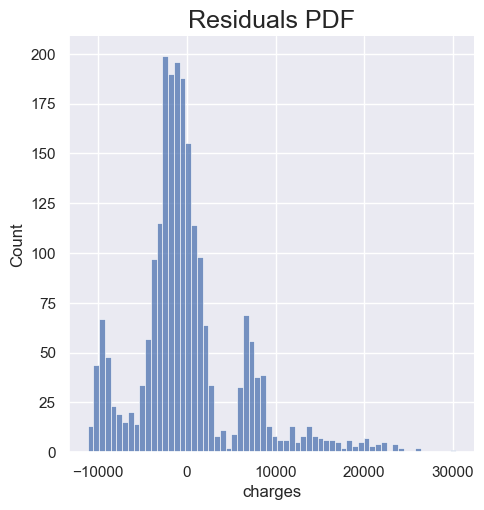

In [49]:
# Residual = Differences between the targets and the predictions
# The residuals are the estimate of errors

sns.displot(y_train - train_data_pred)
plt.title('Residuals PDF', size = 18)

### Building a Predictive System

In [38]:
# we select the random features in order to machine to predict respective charges 
# we will also put the values assigned to categorical varibales

# features used: age:31, sex:female, bmi:25.74, children:0, smoker:no, region:southeast

input_data = (31, 25.74, 0, 0, 1, 0, 0, 0, 1, 0)

In [39]:
# changing inupt_data into numpy array

array_data = np.asarray(input_data)

In [40]:
# reshape the array

array_data_reshaped = array_data.reshape(1,-1)

In [41]:
prediction = reg.predict(array_data_reshaped)

print('The insurance charge is $',prediction)

The insurance charge is $ [3439.46331657]


The original price is 3756.8552. Our model's predictions are close to the original price, therefore the model is complete.

In [53]:
import os

os. getcwd()

'C:\\Users\\lawrj'